In [8]:
import pandas as pd
import numpy as np
import json
import urllib
import requests
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt

import math
import io

import scipy.stats
import scipy.optimize
import scipy.spatial


/Users/weiweiwang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/weiweiwang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
flag = True
offset = 0
listData = []
while flag:
    url = "https://services.arcgis.com/jDGuO8tYggdCCnUJ/arcgis/rest/services/Oklahoma_Class_II_Injection_Well_Volumes_2006_to_2017/FeatureServer/0/query?where=1%3D1&outFields=*&Resultoffset=" + str(offset) + "&outSR=4326&f=json"
    response = requests.get(url)
    ddd = response.json()
    listD = ddd['features']
    listData.extend(listD)
    print(type(listD))
    offset = offset + 2000
    if offset > 13500:
        flag = False
    
print(len(listD))
print(len(listData))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
1636
13636


In [10]:
df2 = pd.DataFrame()

df2[0]=listData[0]['attributes'].keys()
df2[1]=listData[0]['attributes'].values()

df2.set_index([0], inplace = True)

print(len(listData))

13636


In [11]:
for i in range(len(listData)-1):
    df2[i+2] = listData[i+1]['attributes'].values()
    

print(df2.head())

#print(df2[0:3][0:3])

df2.info()

Injection_data = df2.transpose()
Injection_data.set_index('FID',inplace=True)

Injection_data.drop(columns = ['OperatorNa','WellName','WellNumber','API'],axis=1, inplace=True)

                               1                         2      \
0                                                                
FID                                1                         2   
API                       3501924430                3511924320   
Latitude                     34.4433                   36.1018   
Longitude                   -97.5581                  -97.2587   
OperatorNa  LEWIS OIL OPERATIONS LLC  WHITE STAR PETROLEUM LLC   

                                      3                               4      \
0                                                                             
FID                                       3                               4   
API                              3512303100                      3501920810   
Latitude                            34.6119                          34.247   
Longitude                          -96.6139                        -97.5422   
OperatorNa  SHERIDAN PRODUCTION COMPANY LLC  CITATION OIL & GAS

In [12]:
print(Injection_data.head())
print(Injection_data.info())
print(Injection_data.columns)

0   Latitude Longitude   Y2006   Y2007   Y2008   Y2009   Y2010 Y2011M01  \
FID                                                                       
1    34.4433  -97.5581  683126  933187  737349  205898  603746    54000   
2    36.1018  -97.2587       0       0       0       0       0        0   
3    34.6119  -96.6139  443942  344984  295162  255821  282622     8317   
4     34.247  -97.5422  432627  438381  439889  438723  438176    37656   
5    36.4536   -99.455  449409  382572  467427  359000  193043    13329   

0   Y2011M02 Y2011M03  ... Y2017M05 Y2017M06 Y2017M07 Y2017M08 Y2017M09  \
FID                    ...                                                
1      37524    59408  ...  12513.8     5629  8744.28  8478.49     7840   
2          0        0  ...   110277    65028    77158    76208   103293   
3      15562    65428  ...    50938    49681    40821    43783    41857   
4      33602    38252  ...    32380    33069    36105    33548    33220   
5      39826    62957  .

In [13]:
Injection_data_new = Injection_data[['Latitude','Longitude','Y2006','Y2007','Y2008','Y2009','Y2010','F11_Sum','F12_Sum','F13_Sum','F14_Sum','F15_Sum','F16_Sum','F17_Sum']]
Injection_data_new.rename(columns={"F11_Sum": "Y2011","F12_Sum": "Y2012","F13_Sum": "Y2013","F14_Sum": "Y2014","F15_Sum": "Y2015","F16_Sum": "Y2016","F17_Sum": "Y2017"}, inplace = True)
print(Injection_data_new.head())
print(Injection_data_new.info())

#Injection_data_new['Longitude'] = Injection_data_new['Longitude'].astype(str).astype(float)
#Injection_data_new['Latitude'] = Injection_data_new['Latitude'].astype(str).astype(float)
Injection_data_new.info()

Injection_data_new.head()

#Injection_data_new.plot.scatter('Longitude','Latitude')

0   Latitude Longitude   Y2006   Y2007   Y2008   Y2009   Y2010   Y2011  \
FID                                                                      
1    34.4433  -97.5581  683126  933187  737349  205898  603746  418516   
2    36.1018  -97.2587       0       0       0       0       0       0   
3    34.6119  -96.6139  443942  344984  295162  255821  282622  593168   
4     34.247  -97.5422  432627  438381  439889  438723  438176  431245   
5    36.4536   -99.455  449409  382572  467427  359000  193043  494796   

0     Y2012   Y2013   Y2014    Y2015    Y2016    Y2017  
FID                                                     
1    307661  208042  404350   372496    96800   109805  
2         0       0       0  1551996  2376201  1150192  
3    123676  519176  619534   584648   507681   507229  
4    422102  423313  381551   411451   412098   407849  
5    432546  316071  181064   591548   499189   710419  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13636 entries, 1 to 13636
Data c

/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Latitude,Longitude,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
FID,,,,,,,,,,,,,,
1,34.4433,-97.5581,683126,933187,737349,205898,603746,418516,307661,208042,404350,372496,96800,109805
2,36.1018,-97.2587,0,0,0,0,0,0,0,0,0,1551996,2376201,1150192
3,34.6119,-96.6139,443942,344984,295162,255821,282622,593168,123676,519176,619534,584648,507681,507229
4,34.247,-97.5422,432627,438381,439889,438723,438176,431245,422102,423313,381551,411451,412098,407849
5,36.4536,-99.455,449409,382572,467427,359000,193043,494796,432546,316071,181064,591548,499189,710419


In [14]:
flag = True
offset = 0
listData1 = []
while flag:
    url_seismic = "https://services4.arcgis.com/QdHwhlbx61LR3TWb/arcgis/rest/services/Oklahamoa20000101_20180712/FeatureServer/0/query?where=1%3D1&outFields=*&Resultoffset=" + str(offset) + "&outSR=4326&f=json"
    response1 = requests.get(url_seismic)
    ddd1 = response1.json()
    listD = ddd1['features']
    listData1.extend(listD)
    print(type(listD))
    offset = offset + 2000
    if offset > 13500:
        flag = False
    
print(len(listD))
print(len(listData1))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
0
8859


In [15]:
df3 = pd.DataFrame()
df3[0] = listData1[0]['attributes'].keys()
df3[1] = listData1[0]['attributes'].values()

df3.set_index([0], inplace = True)
print(df3.info())
#df3.info()

for i in range(len(listData1)-1):
    df3[i+2] = listData1[i+1]['attributes'].values()
    

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, time to FID
Data columns (total 1 columns):
1    22 non-null object
dtypes: object(1)
memory usage: 368.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, time to FID
Columns: 8859 entries, 1 to 8859
dtypes: object(8859)
memory usage: 1.6+ MB


In [16]:
Seismic_data = df3.transpose()
print(Seismic_data.head())
print(len(Seismic_data))
print(Seismic_data.info())

#dddd = Seismic_data.reset_column()

print(Seismic_data.columns)

Seismic_data.set_index('FID',inplace=True)
print(Seismic_data.head())

print(Seismic_data.loc[:,'nst'])

Seismic_data.drop(columns = ['nst','magError','dmin','magNst','id','depth','updated','status','horizontalError','locationSource','gap','place','magSource','depthError','magType','rms','net','type'],axis=1, inplace=True)
#Seismic_data.dropna(subset=['gap'], inplace=True)
Seismic_data.reset_index()

#Seismic_data.time = pd.to_datetime(Seismic_data.time, format='%Y-%m-%d').strftime('%Y-%m-%d')
from datetime import datetime

timestamp = 1471660487200 // 10**3
Seismic_data.time = Seismic_data.time // 10**3
#Seismic_data.time = datetime.fromtimestamp(Seismic_data.time)
Seismic_data.time = pd.to_datetime(Seismic_data.time,unit='s')
Seismic_data['year'] = Seismic_data.time.dt.year


print(Seismic_data.info())

#print(Seismic_data.loc[:,'gap'])
print(Seismic_data)

0           time latitude longitude  depth  mag magType   nst gap   dmin  \
1  1531223795760  36.8437  -97.7007   2.62  2.6   mb_lg  None  32  0.127   
2  1531207097410  36.2912  -97.5354   7.11  3.6   mb_lg  None  40  0.204   
3  1531142453700  36.5394  -98.9611  6.433  2.6      ml  None  86   None   
4  1531000212550  36.9904  -97.4976    5.2  3.2   mb_lg  None  52  0.027   
5  1530705723960  36.2097  -98.4729      5  2.5   mb_lg  None  59  0.223   

0   rms  ...                            place        type horizontalError  \
1  0.34  ...      5km NE of Medford, Oklahoma  earthquake             1.1   
2  0.18  ...        22km W of Perry, Oklahoma  earthquake             1.1   
3  0.25  ...  24km ENE of Mooreland, Oklahoma  earthquake             3.1   
4  0.26  ...     10km ESE of Caldwell, Kansas  earthquake             1.7   
5  0.22  ...      6km S of Fairview, Oklahoma  earthquake             1.2   

0 depthError magError magNst    status locationSource magSource FID  
1        2

[8859 rows x 5 columns]


In [17]:
print(Injection_data_new)

0     Latitude Longitude    Y2006   Y2007   Y2008   Y2009   Y2010   Y2011  \
FID                                                                         
1      34.4433  -97.5581   683126  933187  737349  205898  603746  418516   
2      36.1018  -97.2587        0       0       0       0       0       0   
3      34.6119  -96.6139   443942  344984  295162  255821  282622  593168   
4       34.247  -97.5422   432627  438381  439889  438723  438176  431245   
5      36.4536   -99.455   449409  382572  467427  359000  193043  494796   
6       35.926  -97.1668  1524308  769686  595484  267410  376377  381937   
7       34.899  -96.4877   319584  346913  358952  427232  440083  439659   
8       35.932  -96.0408   393511  430201  430201  430201  430201  431296   
9      36.1765  -97.4305        0       0       0  541315  712685  681420   
10     36.8989  -98.1313        0       0       0       0       0       0   
11     34.4693   -97.491   175669  384409  462868  438782  437290  509285   

In [18]:
#Injection_data_new['Region'] = np.nan
#print(Injection_data_new)

#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', -1)  # or 199

#pd.set_option('display.max_columns', 100)  # or 1000
#pd.set_option('display.max_rows', 100)  # or 1000
#pd.set_option('display.max_colwidth', -1)  # or 199

for i in range(len(Injection_data_new)):
    if Injection_data_new.loc[i+1]['Latitude'] > 36.25 and Injection_data_new.loc[i+1]['Latitude'] < 37 and Injection_data_new.loc[i+1]['Longitude'] > -99 and Injection_data_new.loc[i+1]['Longitude'] < -97.7:
        Injection_data_new.at[i+1, 'Region'] = 1

for i in range(len(Injection_data_new)):
    if Injection_data_new.loc[i+1]['Latitude'] > 35.5 and Injection_data_new.loc[i+1]['Latitude'] < 36.6 and Injection_data_new.loc[i+1]['Longitude'] > -97.7 and Injection_data_new.loc[i+1]['Longitude'] < -96.7:
        Injection_data_new.at[i+1, 'Region'] = 2

#Injection_data_new.drop(columns = ['Region'],axis=1, inplace=True)

print(Injection_data_new)



/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0     Latitude Longitude    Y2006   Y2007   Y2008   Y2009   Y2010   Y2011  \
FID                                                                         
1      34.4433  -97.5581   683126  933187  737349  205898  603746  418516   
2      36.1018  -97.2587        0       0       0       0       0       0   
3      34.6119  -96.6139   443942  344984  295162  255821  282622  593168   
4       34.247  -97.5422   432627  438381  439889  438723  438176  431245   
5      36.4536   -99.455   449409  382572  467427  359000  193043  494796   
6       35.926  -97.1668  1524308  769686  595484  267410  376377  381937   
7       34.899  -96.4877   319584  346913  358952  427232  440083  439659   
8       35.932  -96.0408   393511  430201  430201  430201  430201  431296   
9      36.1765  -97.4305        0       0       0  541315  712685  681420   
10     36.8989  -98.1313        0       0       0       0       0       0   
11     34.4693   -97.491   175669  384409  462868  438782  437290  509285   

0                   time latitude longitude  mag  year  Region
FID                                                           
1    2018-07-10 11:56:35  36.8437  -97.7007  2.6  2018     1.0
2    2018-07-10 07:18:17  36.2912  -97.5354  3.6  2018     2.0
3    2018-07-09 13:20:53  36.5394  -98.9611  2.6  2018     1.0
4    2018-07-07 21:50:12  36.9904  -97.4976  3.2  2018     NaN
5    2018-07-04 12:02:03  36.2097  -98.4729  2.5  2018     NaN
6    2018-07-03 16:28:14  36.2164  -97.5626  2.8  2018     2.0
7    2018-07-02 21:08:51  35.8897  -97.2811    3  2018     2.0
8    2018-07-02 12:28:04    35.97  -97.8042  2.9  2018     NaN
9    2018-07-02 02:58:25  35.3807  -98.1093  2.8  2018     NaN
10   2018-07-02 00:03:12  36.7573  -98.0551  2.9  2018     1.0
11   2018-07-01 02:58:14  35.8891  -97.2831  3.2  2018     2.0
12   2018-06-30 16:35:51  35.8836  -97.2762  2.6  2018     2.0
13   2018-06-30 16:15:50  35.8843  -97.2785  2.9  2018     2.0
14   2018-06-30 06:28:14  35.4031  -98.0929  2.9  2018 

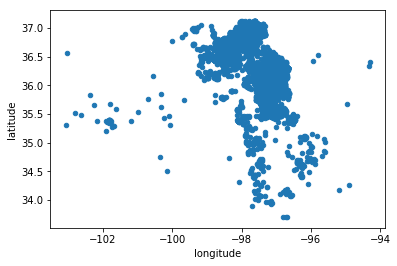

In [19]:
#Injection_data_new['Region'] = np.nan

#print(Seismic_data)

for i in range(len(Seismic_data)):
    if Seismic_data.loc[i+1]['latitude'] > 36.25 and Seismic_data.loc[i+1]['latitude'] < 37 and Seismic_data.loc[i+1]['longitude'] > -99 and Seismic_data.loc[i+1]['longitude'] < -97.7:
        Seismic_data.at[i+1, 'Region'] = 1

for i in range(len(Seismic_data)):
    if Seismic_data.loc[i+1]['latitude'] > 35.5 and Seismic_data.loc[i+1]['latitude'] < 36.6 and Seismic_data.loc[i+1]['longitude'] > -97.7 and Seismic_data.loc[i+1]['longitude'] < -96.7:
        Seismic_data.at[i+1, 'Region'] = 2

#Seismic_data.drop(columns = ['Region'],axis=1, inplace=True)
print(Seismic_data)

Seismic_data['longitude'] = Seismic_data['longitude'].astype(str).astype(float)
Seismic_data['latitude'] = Seismic_data['latitude'].astype(str).astype(float)
Seismic_data['mag'] = Seismic_data['mag'].astype(str).astype(float)
Seismic_data.info()

Seismic_data.plot.scatter('longitude','latitude')

In [20]:
Seismic_data.dropna(subset=['Region'], inplace=True)
print(Seismic_data)
xxx = Seismic_data.min()
print(xxx)
xxxx = Seismic_data.max()
print(xxxx)

0                   time  latitude  longitude  mag  year  Region
FID                                                             
1    2018-07-10 11:56:35   36.8437   -97.7007  2.6  2018     1.0
2    2018-07-10 07:18:17   36.2912   -97.5354  3.6  2018     2.0
3    2018-07-09 13:20:53   36.5394   -98.9611  2.6  2018     1.0
6    2018-07-03 16:28:14   36.2164   -97.5626  2.8  2018     2.0
7    2018-07-02 21:08:51   35.8897   -97.2811  3.0  2018     2.0
10   2018-07-02 00:03:12   36.7573   -98.0551  2.9  2018     1.0
11   2018-07-01 02:58:14   35.8891   -97.2831  3.2  2018     2.0
12   2018-06-30 16:35:51   35.8836   -97.2762  2.6  2018     2.0
13   2018-06-30 16:15:50   35.8843   -97.2785  2.9  2018     2.0
16   2018-06-26 19:48:13   36.7602   -98.0665  2.5  2018     1.0
18   2018-06-23 18:12:48   36.7585   -98.0675  2.7  2018     1.0
19   2018-06-22 23:38:20   36.6684   -98.7615  3.0  2018     1.0
22   2018-06-19 16:33:48   36.8228   -97.7347  2.6  2018     1.0
23   2018-06-19 16:00:38 

In [21]:
Injection_data_new.dropna(subset=['Region'], inplace=True)
print(Injection_data_new)

0     Latitude Longitude    Y2006   Y2007   Y2008   Y2009   Y2010   Y2011  \
FID                                                                         
2      36.1018  -97.2587        0       0       0       0       0       0   
6       35.926  -97.1668  1524308  769686  595484  267410  376377  381937   
9      36.1765  -97.4305        0       0       0  541315  712685  681420   
10     36.8989  -98.1313        0       0       0       0       0       0   
43     36.0714  -96.8074        0       0       0       0       0       0   
67     36.6971  -98.5425        0       0       0       0       0  157162   
76     36.8251  -98.2988   555668  396389  327061  184141  207214  394190   
96     36.5929  -97.3822        0       0       0       0       0       0   
133    36.8124   -98.295        0       0       0       0       0       0   
136    36.5363  -98.4188        0       0       0       0       0       0   
153    36.4437  -96.8644   252000  252000  252000  252000  312500  406384   

/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 1 to 8859
Data columns (total 6 columns):
time         6935 non-null datetime64[ns]
latitude     6935 non-null float64
longitude    6935 non-null float64
mag          6935 non-null float64
year         6935 non-null int64
Region       6935 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 379.3 KB


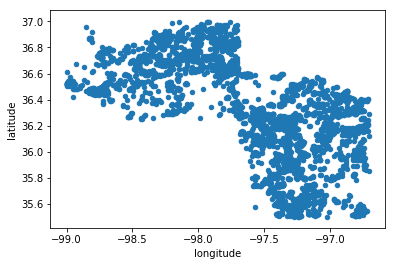

In [22]:
#Seismic_data['longitude'] = Seismic_data['longitude'].astype(str).astype(float)
#Seismic_data['latitude'] = Seismic_data['latitude'].astype(str).astype(float)
#Seismic_data['mag'] = Seismic_data['mag'].astype(str).astype(float)
Seismic_data.info()

Seismic_data.plot.scatter('longitude','latitude')

In [23]:
Seismic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 1 to 8859
Data columns (total 6 columns):
time         6935 non-null datetime64[ns]
latitude     6935 non-null float64
longitude    6935 non-null float64
mag          6935 non-null float64
year         6935 non-null int64
Region       6935 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 379.3 KB


/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 2 to 13632
Data columns (total 15 columns):
Latitude     1623 non-null float64
Longitude    1623 non-null float64
Y2006        1623 non-null float64
Y2007        1623 non-null float64
Y2008        1623 non-null float64
Y2009        1623 non-null float64
Y2010        1623 non-null float64
Y2011        1623 non-null float64
Y2012        1623 non-null float64
Y2013        1623 non-null float64
Y2014        1623 non-null float64
Y2015        1623 non-null float64
Y2016        1623 non-null float64
Y2017        1623 non-null float64
Region       1623 non-null float64
dtypes: float64(15)
memory usage: 202.9 KB


/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


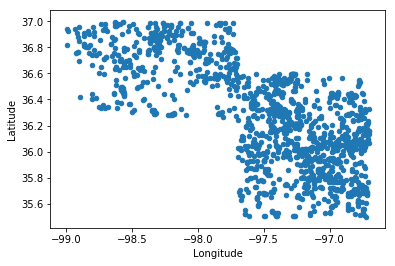

In [24]:
Injection_data_new['Longitude'] = Injection_data_new['Longitude'].astype(str).astype(float)
Injection_data_new['Latitude'] = Injection_data_new['Latitude'].astype(str).astype(float)
Injection_data_new['Y2006'] = Injection_data_new['Y2006'].astype(str).astype(float)
Injection_data_new['Y2007'] = Injection_data_new['Y2007'].astype(str).astype(float)
Injection_data_new['Y2008'] = Injection_data_new['Y2008'].astype(str).astype(float)
Injection_data_new['Y2009'] = Injection_data_new['Y2009'].astype(str).astype(float)
Injection_data_new['Y2010'] = Injection_data_new['Y2010'].astype(str).astype(float)
Injection_data_new['Y2011'] = Injection_data_new['Y2011'].astype(str).astype(float)
Injection_data_new['Y2012'] = Injection_data_new['Y2012'].astype(str).astype(float)
Injection_data_new['Y2013'] = Injection_data_new['Y2013'].astype(str).astype(float)
Injection_data_new['Y2014'] = Injection_data_new['Y2014'].astype(str).astype(float)
Injection_data_new['Y2015'] = Injection_data_new['Y2015'].astype(str).astype(float)
Injection_data_new['Y2016'] = Injection_data_new['Y2016'].astype(str).astype(float)
Injection_data_new['Y2017'] = Injection_data_new['Y2017'].astype(str).astype(float)
Injection_data_new.info()

Injection_data_new.plot.scatter('Longitude','Latitude')

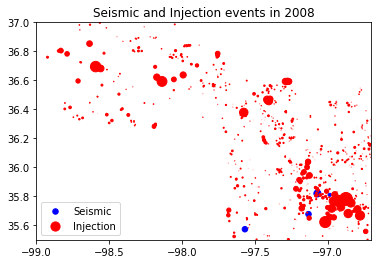

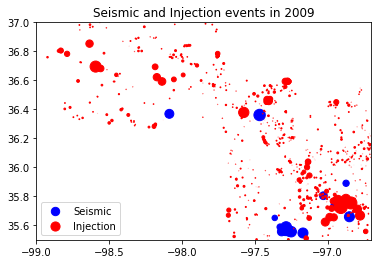

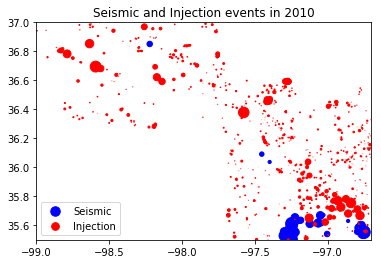

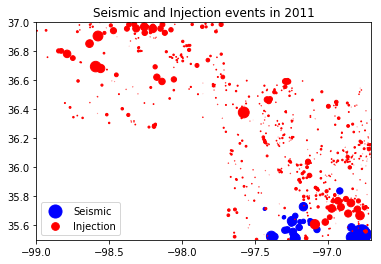

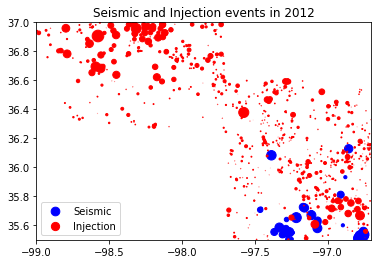

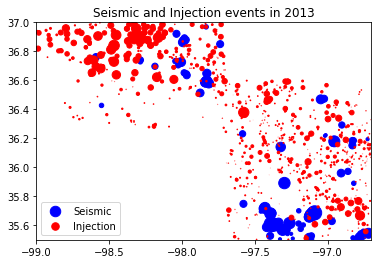

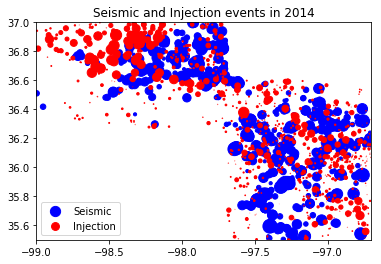

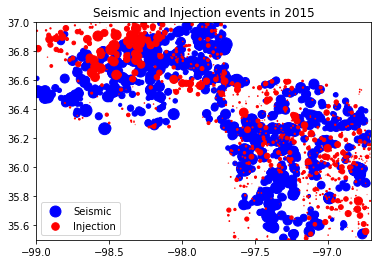

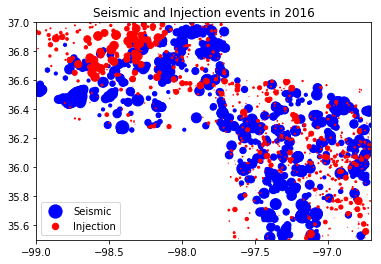

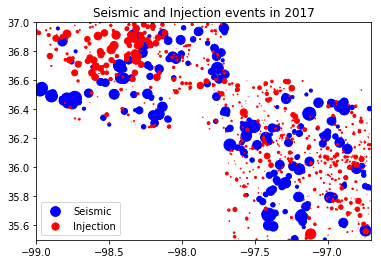

In [25]:


def plotyear_seismic(year):
    data = Seismic_data[Seismic_data.year == year]
    area = (data.mag - 2.4)*100
    area_inj = Injection_data_new['Y' + str(year)]/100000
    
    fig = plt.figure()
    pp = fig.add_subplot(111)
    pp.scatter(data['longitude'],data['latitude'], s=area, c='b', label='Seismic')
    pp.scatter(Injection_data_new['Longitude'],Injection_data_new['Latitude'], s=area_inj, c='r', label='Injection')
    #data.plot.scatter('longitude','latitude', s=area)
    #area_inj = Injection_data_new['Y' + str(year)]/100000
    #Injection_data_new.plot.scatter('Longitude','Latitude', s=area_inj)
    plt.axis(ymin= 35.5, ymax= 37, xmin= -99, xmax=-96.7)
    plt.title("Seismic and Injection events in " + str(year))
    plt.legend(loc='lower left')
    plt.show()

plotyear_seismic(2008)
plotyear_seismic(2009)
plotyear_seismic(2010)
plotyear_seismic(2011)
plotyear_seismic(2012)
plotyear_seismic(2013)
plotyear_seismic(2014)
plotyear_seismic(2015)
plotyear_seismic(2016)
plotyear_seismic(2017)
#from ipywidgets import interact, widgets
#interact(plotyear_seismic, year=widgets.IntSlider(min=2008, max=2018, step=1, value=2011))

In [26]:
Seismic_data.head()

,time,latitude,longitude,mag,year,Region
FID,,,,,,
1,2018-07-10 11:56:35,36.8437,-97.7007,2.6,2018,1.0
2,2018-07-10 07:18:17,36.2912,-97.5354,3.6,2018,2.0
3,2018-07-09 13:20:53,36.5394,-98.9611,2.6,2018,1.0
6,2018-07-03 16:28:14,36.2164,-97.5626,2.8,2018,2.0
7,2018-07-02 21:08:51,35.8897,-97.2811,3.0,2018,2.0


In [27]:
Injection_data_new.head()

,Latitude,Longitude,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Region
FID,,,,,,,,,,,,,,,
2,36.101779,-97.258732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1551996.0,2376201.0,1150192.0,2.0
6,35.926037,-97.166820,1524308.0,769686.0,595484.0,267410.0,376377.0,381937.0,297939.0,211120.0,101463.0,95260.0,155048.0,300553.0,2.0
9,36.176535,-97.430521,0.0,0.0,0.0,541315.0,712685.0,681420.0,692957.0,543265.0,408487.0,519645.0,526353.0,442522.0,2.0
10,36.898900,-98.131300,0.0,0.0,0.0,0.0,0.0,0.0,3018348.0,2586450.0,1224527.0,1406446.0,964530.0,769406.0,1.0
43,36.071396,-96.807438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,535413.0,1000875.0,1886827.0,1553472.0,2.0


In [28]:
Seismic_1 = Seismic_data[Seismic_data.Region == 1]
Seismic_2 = Seismic_data[Seismic_data.Region == 2]
Inj_1 = Injection_data_new[Injection_data_new.Region ==1]
Inj_2 = Injection_data_new[Injection_data_new.Region ==2]

In [29]:
Seis_count_1 = []
Seis_count_2 = []
Inj_sum_1 = []
Inj_sum_2 = []
Inj_well_num_1 = []
Inj_well_num_2 = []
year = []
Seis_max_mag_1 = []
Seis_max_mag_2 = []
number =0
for yy in range(2008,2018):
    year.append(yy)
    S1 = len(Seismic_1[Seismic_1.year == yy])
    Seis_count_1.append(S1)
    S2 = len(Seismic_2[Seismic_2.year == yy])
    Seis_count_2.append(S2)
    
    S1 = Seismic_1[Seismic_1.year == yy]['mag'].max()
    Seis_max_mag_1.append(S1)
    S2 = Seismic_2[Seismic_2.year == yy]['mag'].max()
    Seis_max_mag_2.append(S2)
    
    J1 = Inj_1['Y' + str(yy)].sum()
    Inj_sum_1.append(J1)
    J2 = Inj_2['Y' + str(yy)].sum()
    Inj_sum_2.append(J2)
    J1list = Inj_1['Y' + str(yy)]
    J2list = Inj_2['Y' + str(yy)]
    J1num = len(J1list[J1list > 500000])
    Inj_well_num_1.append(J1num)
    J2num = len(J2list[J2list > 500000])
    Inj_well_num_2.append(J2num)


In [30]:
Inj_sum_1

[76481618.0,
 78802502.0,
 87233424.0,
 144276367.39,
 258242595.0,
 414710626.0,
 501623813.94,
 511178145.67,
 370792727.49,
 292480342.25]

In [31]:
Inj_sum_2

[242113292.0,
 225196806.0,
 196281938.0,
 178180724.38,
 188633551.0,
 232091307.33999997,
 333039336.45,
 293273199.66,
 202757009.55,
 170171731.96]

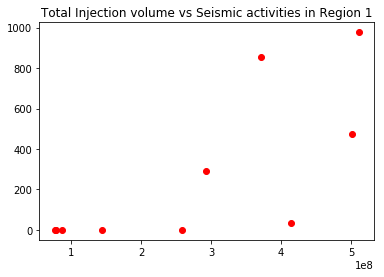

In [32]:
plt.scatter(Inj_sum_1, Seis_count_1, c = 'r')
plt.title("Total Injection volume vs Seismic activities in Region 1")
plt.show()

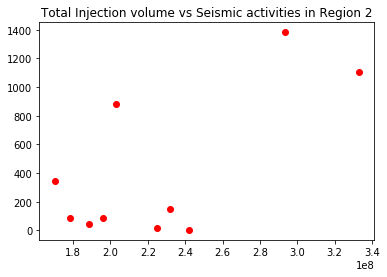

In [33]:
plt.scatter(Inj_sum_2, Seis_count_2, c = 'r')
plt.title("Total Injection volume vs Seismic activities in Region 2")
plt.show()

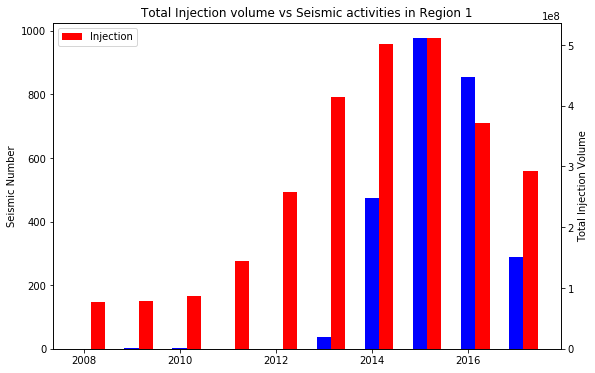

In [34]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)
ax2 = ax.twinx()
ax.bar(year, Seis_count_1, width=0.3, color ='blue', label='Seismic')
ax2.bar(np.array(year,dtype=float) + 0.3 , Inj_sum_1, width =0.3, color='red', label='Injection')
#plt.axis(ymin= 35.5, ymax= 37, xmin= -99, xmax=-96.7)
#plt.title("Seismic and Injection events in ")
ax.set_ylabel('Seismic Number')
ax2.set_ylabel('Total Injection Volume')
plt.title('Total Injection volume vs Seismic activities in Region 1')
plt.legend(loc='upper left')
plt.show()

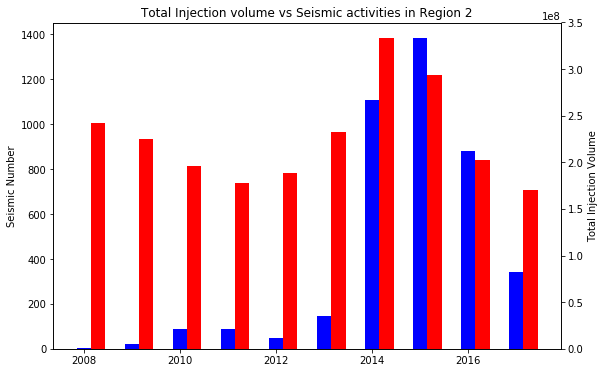

In [35]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(122)
ax2 = ax.twinx()
ax.bar(year, Seis_count_2, width=0.3, color ='blue', label='Seismic')
ax2.bar(np.array(year,dtype=float) + 0.3 , Inj_sum_2, width =0.3, color='red', label='Injection')
#plt.axis(ymin= 35.5, ymax= 37, xmin= -99, xmax=-96.7)
#plt.title("Seismic and Injection events in ")
ax.set_ylabel('Seismic Number')
ax2.set_ylabel('Total Injection Volume')
plt.title('Total Injection volume vs Seismic activities in Region 2')
plt.show()

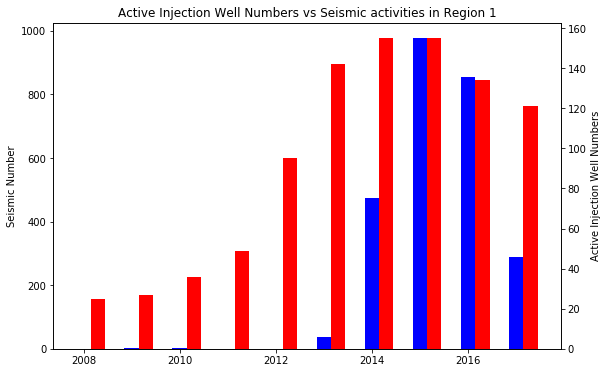

In [36]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(122)
ax2 = ax.twinx()
ax.bar(year, Seis_count_1, width=0.3, color ='blue', label='Seismic')
ax2.bar(np.array(year,dtype=float) + 0.3 , Inj_well_num_1, width =0.3, color='red', label='Injection')
#plt.axis(ymin= 35.5, ymax= 37, xmin= -99, xmax=-96.7)
#plt.title("Seismic and Injection events in ")
ax.set_ylabel('Seismic Number')
ax2.set_ylabel('Active Injection Well Numbers')
plt.title('Active Injection Well Numbers vs Seismic activities in Region 1')
plt.show()

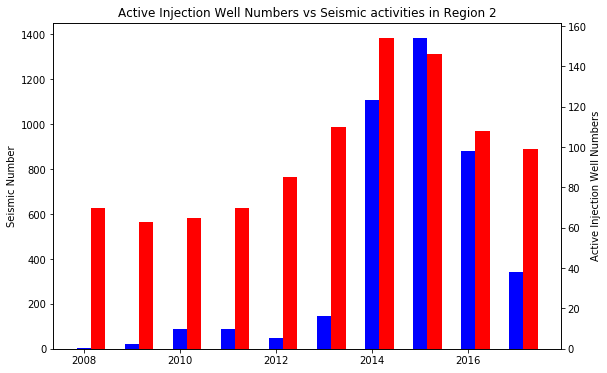

In [37]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(122)
ax2 = ax.twinx()
ax.bar(year, Seis_count_2, width=0.3, color ='blue', label='Seismic')
ax2.bar(np.array(year,dtype=float) + 0.3 , Inj_well_num_2, width =0.3, color='red', label='Injection')
#plt.axis(ymin= 35.5, ymax= 37, xmin= -99, xmax=-96.7)
#plt.title("Seismic and Injection events in ")
ax.set_ylabel('Seismic Number')
ax2.set_ylabel('Active Injection Well Numbers')
plt.title('Active Injection Well Numbers vs Seismic activities in Region 2')
plt.show()

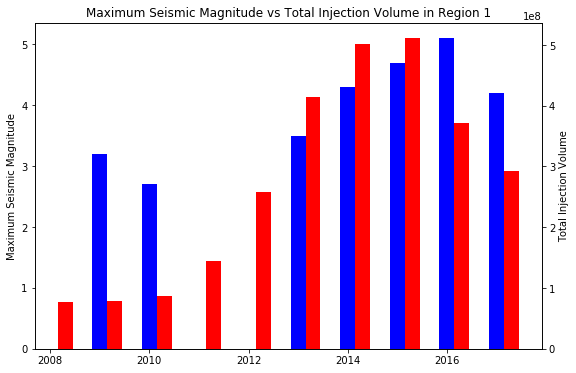

In [38]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(122)
ax2 = ax.twinx()
ax.bar(year, Seis_max_mag_1, width=0.3, color ='blue', label='Seismic')
ax2.bar(np.array(year,dtype=float) + 0.3 , Inj_sum_1, width =0.3, color='red', label='Injection')
#plt.axis(ymin= 35.5, ymax= 37, xmin= -99, xmax=-96.7)
#plt.title("Seismic and Injection events in ")
ax.set_ylabel('Maximum Seismic Magnitude')
ax2.set_ylabel('Total Injection Volume')
plt.title('Maximum Seismic Magnitude vs Total Injection Volume in Region 1')
plt.show()

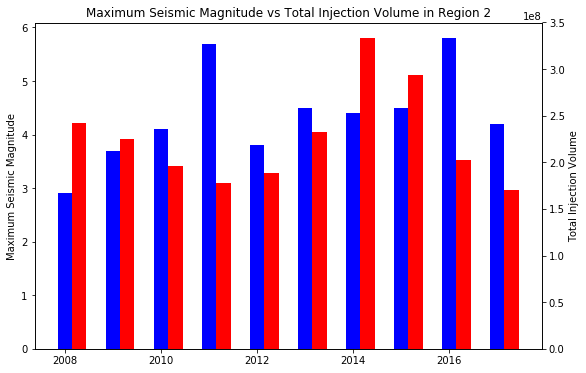

In [39]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(122)
ax2 = ax.twinx()
ax.bar(year, Seis_max_mag_2, width=0.3, color ='blue', label='Seismic')
ax2.bar(np.array(year,dtype=float) + 0.3 , Inj_sum_2, width =0.3, color='red', label='Injection')
#plt.axis(ymin= 35.5, ymax= 37, xmin= -99, xmax=-96.7)
#plt.title("Seismic and Injection events in ")
ax.set_ylabel('Maximum Seismic Magnitude')
ax2.set_ylabel('Total Injection Volume')
plt.title('Maximum Seismic Magnitude vs Total Injection Volume in Region 2')
plt.show()

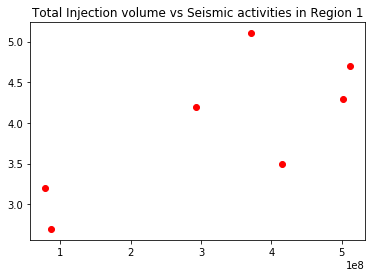

In [40]:
plt.scatter(Inj_sum_1, Seis_max_mag_1, c = 'r')
plt.title("Total Injection volume vs Seismic activities in Region 1")
plt.show()

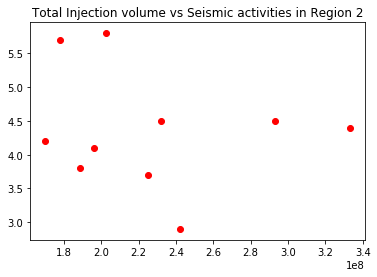

In [41]:
plt.scatter(Inj_sum_2, Seis_max_mag_2, c = 'r')
plt.title("Total Injection volume vs Seismic activities in Region 2")
plt.show()

#in this analysis, I want to utilize statistical inference to perform hypothesis testing by evaluating P values.
#the hypothesis that I made is the seismic activity (total seismic number) is porputional to the total injection volume
#I will take zone 2 for testing

In [42]:
# in this analysis, I want to utilize statistical inference to perform hypothesis testing by evaluating P values.
# the hypothesis that I made is the seismic activity (total seismic number) is porputional to the total injection volume
# I will take zone 2 for testing

Seis_count_2
#sum(Seis_count_2)

[4, 20, 87, 90, 48, 148, 1107, 1383, 881, 343]

In [43]:
Seis_count_2_array = np.array(Seis_count_2, dtype=np.float64)
Seis_count_2_normalized = Seis_count_2_array / float(sum(Seis_count_2_array))
Seis_count_2_normalized

array([0.000973  , 0.004865  , 0.02116273, 0.02189248, 0.01167599,
       0.03600097, 0.26927755, 0.3364145 , 0.21430309, 0.08343469])

In [44]:
type(sum(Inj_sum_2))

numpy.float64

In [45]:
Inj_sum_2_normlized = Inj_sum_2 / sum(Inj_sum_2)

Inj_sum_2_normlized

array([0.10704741, 0.09956799, 0.08678364, 0.07878041, 0.083402  ,
       0.10261631, 0.14724924, 0.12966713, 0.08964651, 0.07523934])

In [46]:
def simulate(n):
    return pd.DataFrame({'year': np.random.choice([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017], size=n, p=Inj_sum_2_normlized)})

In [47]:
simulate(sum(Seis_count_2)).year.value_counts()

2014    608
2015    531
2008    457
2013    413
2009    407
2010    391
2016    367
2012    327
2017    314
2011    296
Name: year, dtype: int64

In [48]:
simu_seis_2008 = pd.DataFrame({'counts':[simulate(sum(Seis_count_2)).year.value_counts()[2008] for i in range(5000)]})
simu_seis_2014 = pd.DataFrame({'counts':[simulate(sum(Seis_count_2)).year.value_counts()[2014] for i in range(5000)]})
simu_seis_2015 = pd.DataFrame({'counts':[simulate(sum(Seis_count_2)).year.value_counts()[2015] for i in range(5000)]})
simu_seis_2016 = pd.DataFrame({'counts':[simulate(sum(Seis_count_2)).year.value_counts()[2016] for i in range(5000)]})
simu_seis_2017 = pd.DataFrame({'counts':[simulate(sum(Seis_count_2)).year.value_counts()[2017] for i in range(5000)]})

100.0

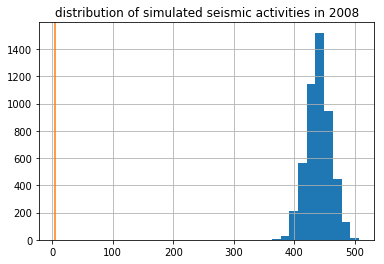

In [49]:
simu_seis_2008.counts.hist()
plt.axvline(Seis_count_2[0], c='C1')
plt.title('distribution of simulated seismic activities in 2008')
P_2008 = 100- scipy.stats.percentileofscore(simu_seis_2008.counts, Seis_count_2[0])
P_2008
# it means strongly no correlation at year 2008, seismic num = 4

0.0

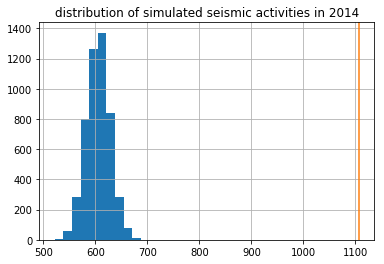

In [50]:
simu_seis_2014.counts.hist()
plt.axvline(Seis_count_2[6], c='C1')
plt.title('distribution of simulated seismic activities in 2014')
P_2014 = 100- scipy.stats.percentileofscore(simu_seis_2014.counts, Seis_count_2[6])
P_2014
# 

0.0

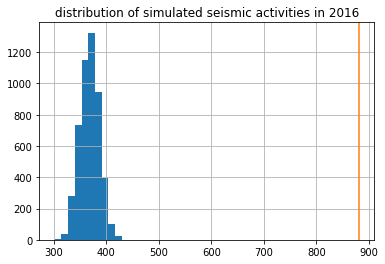

In [51]:
simu_seis_2016.counts.hist()
plt.axvline(Seis_count_2[8], c='C1')
plt.title('distribution of simulated seismic activities in 2016')
P_2016 = 100- scipy.stats.percentileofscore(simu_seis_2014.counts, Seis_count_2[8])
P_2016

In [52]:
# I saw that before 2014, there is almost no seismic data, If we only take the injection and seismic data in year
# 2014, 2015, 2016, and 2017, to see the correlation between injection volume and seismic #

Seis_count_2_2014_2017 = Seis_count_2[6:]
Seis_count_2_2014_2017

[1107, 1383, 881, 343]

In [53]:
Inj_sum_2_2014_2017 = Inj_sum_2[6:]
Inj_sum_2_2014_2017

[333039336.45, 293273199.66, 202757009.55, 170171731.96]

In [54]:
Inj_sum_2_2014_2017_normalized = Inj_sum_2_2014_2017/sum(Inj_sum_2_2014_2017)
Inj_sum_2_2014_2017_normalized

array([0.33329221, 0.29349588, 0.20291096, 0.17030094])

In [55]:
def simulate_2014_2017(n):
    return pd.DataFrame({'year': np.random.choice([2014,2015,2016,2017], size=n, p=Inj_sum_2_2014_2017_normalized)})

In [56]:
simulate_2014_2017(sum(Seis_count_2_2014_2017)).year.value_counts()

2014    1239
2015    1056
2016     795
2017     624
Name: year, dtype: int64

In [57]:
simu_seis_2014_new = pd.DataFrame({'counts':[simulate_2014_2017(sum(Seis_count_2_2014_2017)).year.value_counts()[2014] for i in range(5000)]})
simu_seis_2015_new = pd.DataFrame({'counts':[simulate_2014_2017(sum(Seis_count_2_2014_2017)).year.value_counts()[2015] for i in range(5000)]})
simu_seis_2016_new = pd.DataFrame({'counts':[simulate_2014_2017(sum(Seis_count_2_2014_2017)).year.value_counts()[2016] for i in range(5000)]})
simu_seis_2017_new = pd.DataFrame({'counts':[simulate_2014_2017(sum(Seis_count_2_2014_2017)).year.value_counts()[2017] for i in range(5000)]})

100.0

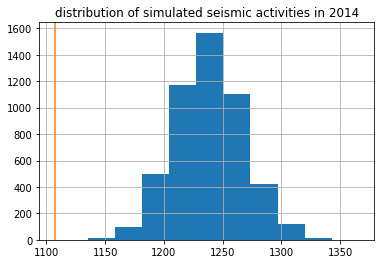

In [58]:
simu_seis_2014_new.counts.hist()
plt.axvline(Seis_count_2[6], c='C1')
plt.title('distribution of simulated seismic activities in 2014')
P_2014 = 100- scipy.stats.percentileofscore(simu_seis_2014_new.counts, Seis_count_2[6])
P_2014

0.0

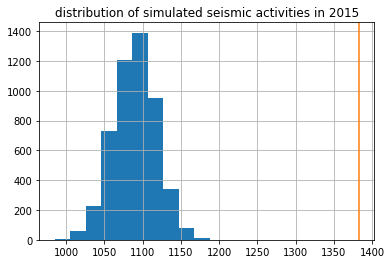

In [59]:
simu_seis_2015_new.counts.hist()
plt.axvline(Seis_count_2[7], c='C1')
plt.title('distribution of simulated seismic activities in 2015')
P_2015 = 100- scipy.stats.percentileofscore(simu_seis_2015_new.counts, Seis_count_2[7])
P_2015

0.0

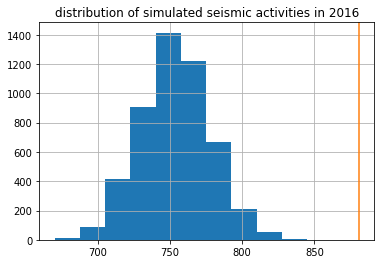

In [60]:
simu_seis_2016_new.counts.hist()
plt.axvline(Seis_count_2[8], c='C1')
plt.title('distribution of simulated seismic activities in 2016')
P_2016 = 100- scipy.stats.percentileofscore(simu_seis_2016_new.counts, Seis_count_2[8])
P_2016

100.0

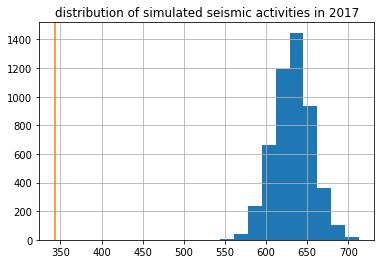

In [61]:
simu_seis_2017_new.counts.hist()
plt.axvline(Seis_count_2[9], c='C1')
plt.title('distribution of simulated seismic activities in 2017')
P_2017 = 100- scipy.stats.percentileofscore(simu_seis_2017_new.counts, Seis_count_2[9])
P_2017

In [62]:
scipy.stats.ttest_ind(simu_seis_2017_new.counts, simu_seis_2014.counts)


Ttest_indResult(statistic=57.49136619664243, pvalue=0.0)

In [63]:
def simulate_seismic(n):
    return pd.DataFrame({'year': np.random.choice([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017], size=n, p=Seis_count_2_normalized)})

In [64]:
simulate_seismic(sum(Seis_count_2)).year.value_counts()

2015    1366
2014    1125
2016     934
2017     317
2013     158
2011      86
2010      75
2012      33
2009      15
2008       2
Name: year, dtype: int64

In [65]:
#raw_seis_2008 = pd.DataFrame({'counts':[simulate_seismic(sum(Seis_count_2)).year.value_counts()[2008] for i in range(5000)]})
raw_seis_2014 = pd.DataFrame({'counts':[simulate_seismic(sum(Seis_count_2)).year.value_counts()[2014] for i in range(5000)]})
raw_seis_2015 = pd.DataFrame({'counts':[simulate_seismic(sum(Seis_count_2)).year.value_counts()[2015] for i in range(5000)]})
raw_seis_2016 = pd.DataFrame({'counts':[simulate_seismic(sum(Seis_count_2)).year.value_counts()[2016] for i in range(5000)]})
raw_seis_2017 = pd.DataFrame({'counts':[simulate_seismic(sum(Seis_count_2)).year.value_counts()[2017] for i in range(5000)]})

In [66]:
scipy.stats.ttest_ind(raw_seis_2017.counts.to_numpy(),simu_seis_2017.counts.to_numpy()) 

Ttest_indResult(statistic=96.9646491467244, pvalue=0.0)

In [67]:
scipy.stats.ttest_ind(raw_seis_2014.counts.to_numpy(),simu_seis_2014.counts.to_numpy()) 

Ttest_indResult(statistic=967.5965045201898, pvalue=0.0)

In [68]:
scipy.stats.ttest_ind(raw_seis_2016.counts.to_numpy(),simu_seis_2016.counts.to_numpy()) 

Ttest_indResult(statistic=1123.6895053088901, pvalue=0.0)

In [69]:
scipy.stats.t.sf(0.2,1) 

0.43716704181099886

In [70]:
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

scipy.stats.ttest_ind(a,b)

#type(a)

Ttest_indResult(statistic=6.04547122820775, pvalue=1.0269199546014704e-05)

In [71]:
type(a)

numpy.ndarray

In [72]:
type(raw_seis_2014)

pandas.core.frame.DataFrame

In [73]:
raw_seis_2014.head()

,counts
0,1097
1,1135
2,1093
3,1105
4,1084


In [74]:
raw_seis_2014.counts.to_numpy()

array([1097, 1135, 1093, ..., 1084, 1109, 1111])

In [75]:
a

array([0.91739024, 1.22652396, 2.11986483, 2.00829381, 2.4328165 ,
       2.02834254, 1.86229072, 3.52762898, 3.28503208, 3.31940009])

the leave one out cross validation is utilized in this analysis as there is very few data in this project. Linear regression and decision tree method will be utilized for regression analysis

In [222]:
# region 2, injection volume - total seismic number, linear regression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn

lm = LinearRegression()
cv = LeaveOneOut()

Inj_sum_2_array = np.array(Inj_sum_2)
Seis_count_2_array = np.array(Seis_count_2)

#Inj can be 10^8 and seis is in the order of 100, will need to normalize first

norm = np.linalg.norm(Inj_sum_2_array)
Inj_sum_2_array_s = Inj_sum_2_array/norm
norm = np.linalg.norm(Seis_count_2_array)
Seis_count_2_array_s = Seis_count_2_array/norm


model = lm.fit(Inj_sum_2_array_s.reshape(-1,1), Seis_count_2_array_s)
scores = cross_val_score(model, Inj_sum_2_array_s.reshape(-1,1), Seis_count_2_array_s, scoring='neg_mean_absolute_error', cv=cv)

print("Folds" + str(len(scores)) + ", MSE:" + str(np.mean(np.abs(scores))) + ", STD:" + str(np.std(scores)))

scores

Folds10, MSE:0.17347735482817989, STD:0.12586990152650923


array([-0.2859918 , -0.21176226, -0.0715576 , -0.00058148, -0.06627462,
       -0.16686398, -0.01939233, -0.3627335 , -0.35353036, -0.19608562])

In [221]:
# region 2, injection volume - total seismic number, decision tree
# import library
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

lm = DecisionTreeRegressor()
cv = LeaveOneOut()

# transform ot numpy array
Inj_sum_2_array = np.array(Inj_sum_2)
Seis_count_2_array = np.array(Seis_count_2)

# normalize
norm = np.linalg.norm(Inj_sum_2_array)
Inj_sum_2_array_s = Inj_sum_2_array/norm
norm = np.linalg.norm(Seis_count_2_array)
Seis_count_2_array_s = Seis_count_2_array/norm

# model, cross validation
model = lm.fit(Inj_sum_2_array_s.reshape(-1,1), Seis_count_2_array_s)
scores = cross_val_score(model, Inj_sum_2_array_s.reshape(-1,1), Seis_count_2_array_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs = -1)

print("Folds" + str(len(scores)) + ", MSE:" + str(np.mean(np.abs(scores))) + ", STD:" + str(np.std(scores)))

print(scores)


Folds10, MSE:0.1528756907292967, STD:0.12580842265801187
[-0.07135851 -0.06342978 -0.39346288 -0.12537293 -0.01932626 -0.06342978
 -0.13677047 -0.13677047 -0.39346288 -0.12537293]


In [212]:
#p1 = plt.scatter(Inj_sum_2_array, Seis_count_2, c='blue', marker = "o", label = 'Raw data')
#p2 = plt.plot(Inj_sum_2_array, y_pred_LR, c='black', linestyle= "-", label = 'Linear Regression')
#p3 = plt.scatter(Inj_sum_2_array, y_pred_DT, c='red', marker = "+", s = 200, label ='Decision Tree')

#plt.xlabel('total injection volume in region 2')
#plt.ylabel('total seismic activity in region 2')

#plt.legend()

#plt.show()

In [223]:
# region 2, injection volume - max seismic magnitude, linear regression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
cv = LeaveOneOut()
#lm.fit(Inj_sum_2, Seis_count_2)
#model = LinearRegression().fit(Inj_sum_2, Seis_count_2)

Inj_sum_2_array = np.array(Inj_sum_2)
Seis_max_mag_2_array = np.array(Seis_max_mag_2)

# normalize
norm = np.linalg.norm(Inj_sum_2_array)
Inj_sum_2_array_s = Inj_sum_2_array/norm
norm = np.linalg.norm(Seis_max_mag_2_array)
Seis_max_mag_2_array_s = Seis_max_mag_2_array/norm

model = lm.fit(Inj_sum_2_array_s.reshape(-1,1), Seis_max_mag_2_array_s)
scores = cross_val_score(model, Inj_sum_2_array_s.reshape(-1,1), Seis_max_mag_2_array_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs = -1)

print("Folds" + str(len(scores)) + ", MSE:" + str(np.mean(np.abs(scores))) + ", STD:" + str(np.std(scores)))



Folds10, MSE:0.059833315059186445, STD:0.035697217062961965


In [225]:
# region 2, injection volume - max seismic magnitude, decision tree regression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

lm = DecisionTreeRegressor()
cv = LeaveOneOut()
#lm.fit(Inj_sum_2, Seis_count_2)
#model = LinearRegression().fit(Inj_sum_2, Seis_count_2)

Inj_sum_2_array = np.array(Inj_sum_2)
Seis_max_mag_2_array = np.array(Seis_max_mag_2)

# normalize
norm = np.linalg.norm(Inj_sum_2_array)
Inj_sum_2_array_s = Inj_sum_2_array/norm
norm = np.linalg.norm(Seis_max_mag_2_array)
Seis_max_mag_2_array_s = Seis_max_mag_2_array/norm

model = lm.fit(Inj_sum_2_array_s.reshape(-1,1), Seis_max_mag_2_array_s)
scores = cross_val_score(model, Inj_sum_2_array_s.reshape(-1,1), Seis_max_mag_2_array_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs = -1)

print("Folds" + str(len(scores)) + ", MSE:" + str(np.mean(np.abs(scores))) + ", STD:" + str(np.std(scores)))

print(scores)

Folds10, MSE:0.07196317353347922, STD:0.04522593634527016
[-0.11400107 -0.05700053 -0.12112613 -0.106876   -0.0213752  -0.05700053
 -0.00712507 -0.00712507 -0.12112613 -0.106876  ]


In [227]:
# region 1, injection volume - total seismic number, linear regression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
cv = LeaveOneOut()
#lm.fit(Inj_sum_2, Seis_count_2)
#model = LinearRegression().fit(Inj_sum_2, Seis_count_2)

Inj_sum_1_array = np.array(Inj_sum_1)
Seis_count_1_array = np.array(Seis_count_1)

# normalize
norm = np.linalg.norm(Inj_sum_1_array)
Inj_sum_1_array_s = Inj_sum_1_array/norm
norm = np.linalg.norm(Seis_count_1_array)
Seis_count_1_array_s = Seis_count_1_array/norm

model = lm.fit(Inj_sum_1_array_s.reshape(-1,1), Seis_count_1_array_s)
scores = cross_val_score(model, Inj_sum_1_array_s.reshape(-1,1), Seis_count_1_array_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs = -1)

print("Folds" + str(len(scores)) + ", MSE:" + str(np.mean(np.abs(scores))) + ", STD:" + str(np.std(scores)))



Folds10, MSE:0.1621765336730901, STD:0.14136250400969122


In [229]:
# region 1, injection volume - total seismic number, decision tree
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

lm = DecisionTreeRegressor()
cv = LeaveOneOut()
#lm.fit(Inj_sum_2, Seis_count_2)
#model = LinearRegression().fit(Inj_sum_2, Seis_count_2)

Inj_sum_1_array = np.array(Inj_sum_1)
Seis_count_1_array = np.array(Seis_count_1)

# normalize
norm = np.linalg.norm(Inj_sum_1_array)
Inj_sum_1_array_s = Inj_sum_1_array/norm
norm = np.linalg.norm(Seis_count_1_array)
Seis_count_1_array_s = Seis_count_1_array/norm

model = lm.fit(Inj_sum_1_array_s.reshape(-1,1), Seis_count_1_array_s)
scores = cross_val_score(model, Inj_sum_1_array_s.reshape(-1,1), Seis_count_1_array_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs = -1)

print("Folds" + str(len(scores)) + ", MSE:" + str(np.mean(np.abs(scores))) + ", STD:" + str(np.std(scores)))



Folds10, MSE:0.22846856639026064, STD:0.22093002019049726


In [240]:
# region 1, injection volume - max seismic magnitude, linear regression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
cv = LeaveOneOut()
#lm.fit(Inj_sum_2, Seis_count_2)
#model = LinearRegression().fit(Inj_sum_2, Seis_count_2)

Inj_sum_1_array = np.array(Inj_sum_1)
Seis_max_mag_1_array = np.array(Seis_max_mag_1)

np.nan_to_num(Seis_max_mag_1_array, copy=False)

# normalize
norm = np.linalg.norm(Inj_sum_1_array)
Inj_sum_1_array_s = Inj_sum_1_array/norm
norm = np.linalg.norm(Seis_max_mag_1_array)
Seis_max_mag_1_array_s = Seis_max_mag_1_array/norm

model = lm.fit(Inj_sum_1_array_s.reshape(-1,1), Seis_max_mag_1_array_s)
scores = cross_val_score(model, Inj_sum_1_array_s.reshape(-1,1), Seis_max_mag_1_array_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs = -1)

print("Folds" + str(len(scores)) + ", MSE:" + str(np.mean(np.abs(scores))) + ", STD:" + str(np.std(scores)))


Folds10, MSE:0.14237294814067586, STD:0.0845569329767945


In [241]:
# region 1, injection volume - max seismic magnitude, Decision tree
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

lm = DecisionTreeRegressor()
cv = LeaveOneOut()
#lm.fit(Inj_sum_2, Seis_count_2)
#model = LinearRegression().fit(Inj_sum_2, Seis_count_2)

Inj_sum_1_array = np.array(Inj_sum_1)
Seis_max_mag_1_array = np.array(Seis_max_mag_1)

np.nan_to_num(Seis_max_mag_1_array, copy=False)

# normalize
norm = np.linalg.norm(Inj_sum_1_array)
Inj_sum_1_array_s = Inj_sum_1_array/norm
norm = np.linalg.norm(Seis_max_mag_1_array)
Seis_max_mag_1_array_s = Seis_max_mag_1_array/norm

model = lm.fit(Inj_sum_1_array_s.reshape(-1,1), Seis_max_mag_1_array_s)
scores = cross_val_score(model, Inj_sum_1_array_s.reshape(-1,1), Seis_max_mag_1_array_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs = -1)

print("Folds" + str(len(scores)) + ", MSE:" + str(np.mean(np.abs(scores))) + ", STD:" + str(np.std(scores)))



Folds10, MSE:0.20603984191096866, STD:0.133568485442795
